# Load Imports and Data

In [1]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

from model.model import *
from model.plotting import *
from preprocess import *

%load_ext autoreload
%autoreload 2

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [ ]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
pickle_data(preprocess(alldat, verbose = False))

# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [2]:
train, test = train_test_split(load_processed_data())

Processed Data loaded


In [3]:
train.head(3).T

,0,1,2
session,0,0,0
session_type,train,train,train
mouse_name,Cori,Cori,Cori
trial_number,0,1,2
go_trial,True,True,True
gocue,1027.22,874.414,825.213
response_time,1150.2,1399.5,949.291
latency,122.987,525.089,124.078
mouse_resp,1,-1,1
wheel_velocity,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0..."


## Change in Latency

In [4]:
# calculate new features
train['fut_lat_chg'] = train.apply(lambda row: row['fut_latency'] - row['latency'], axis=1)
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))
train['diff_chg'] = train.apply(lambda row: (row['fut_difficulty'] - row['pres_difficulty']), axis=1)

In [5]:
# Subsetting # 1
only_go = train[train['go_trial']][train['fut_go_trial']]

c:\users\xiw019\anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


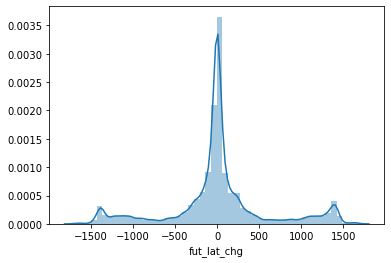

In [6]:
sns.distplot(only_go['fut_lat_chg'])

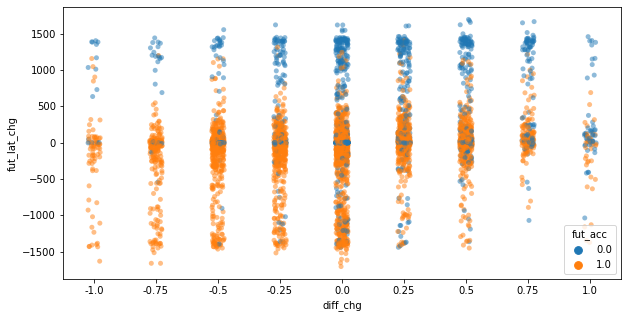

In [7]:
plt.figure(figsize=(10,5))
sns.stripplot(x='diff_chg', y='fut_lat_chg', hue='fut_acc', data=only_go, jitter=True, alpha = 0.5)

Able to split the trimodal distribution a little bit more, with future accuracy splitting the left bimodal and right bimodal. Difficulty is not helpful in splitting the distribution.

## Nonparametric Statistics

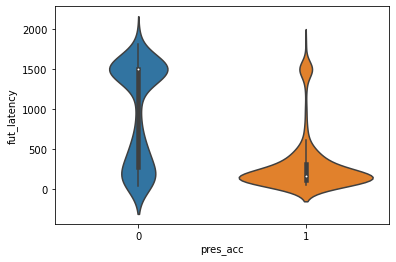

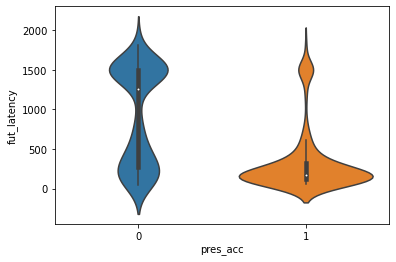

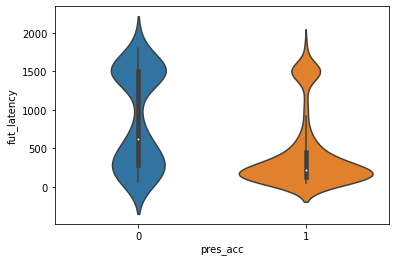

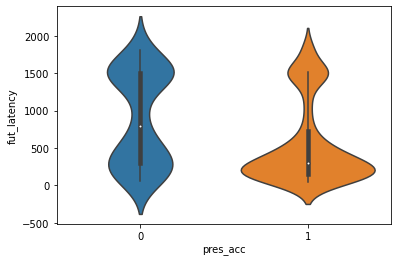

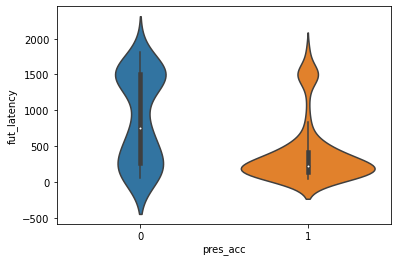

In [8]:
for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(only_go, y = "fut_latency", features = ["pres_acc"], filter_= f, hue = 'pres_acc')

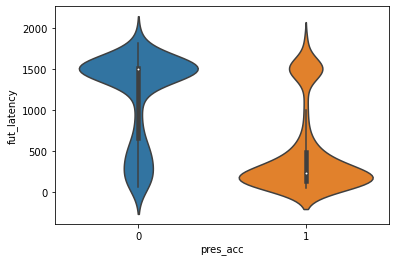

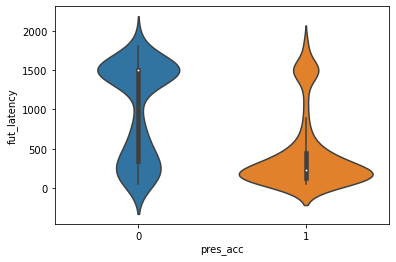

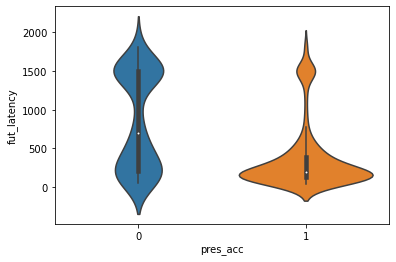

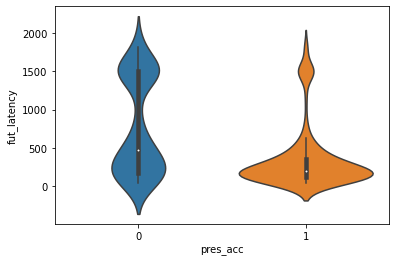

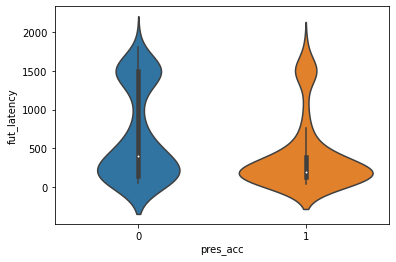

In [9]:
for dif in np.unique(train['pres_difficulty']):
    plt.figure()
    sns.violinplot(x='pres_acc', y='fut_latency', data=only_go[only_go['pres_difficulty'] == dif])

In [ ]:
binary_test(only_go, 'pres_acc', 'latency')

In [24]:
df1 = binary_test(only_go, 'pres_acc', 'fut_latency')

Variable of interst: pres_acc
Possible values: [0 1]
Difficulty: 0.0
        U-val       tail         p-val       RBC      CLES
MWU  251225.0  two-sided  4.899006e-64 -0.613856  0.806928
Difficulty: 0.25
        U-val       tail         p-val       RBC      CLES
MWU  157314.0  two-sided  1.172333e-37 -0.502113  0.751056
Difficulty: 0.5
        U-val       tail         p-val       RBC      CLES
MWU  192230.0  two-sided  4.764539e-30 -0.439882  0.719941
Difficulty: 0.75
        U-val       tail         p-val       RBC      CLES
MWU  105398.0  two-sided  2.519507e-20 -0.392266  0.696133
Difficulty: 1.0
       U-val       tail     p-val       RBC      CLES
MWU  22849.0  two-sided  0.000037 -0.244499  0.622249


In [28]:
df1['p-vals-corrected'] = pg.multicomp(df1['p-val'].to_numpy(), alpha=0.01, method='bonf')[1]

In [29]:
df1

,U-val,tail,p-val,RBC,CLES,p-vals-corrected
MWU,251225.0,two-sided,4.899006e-64,-0.613856,0.806928,2.449503e-63
MWU,157314.0,two-sided,1.172333e-37,-0.502113,0.751056,5.861663e-37
MWU,192230.0,two-sided,4.764539e-30,-0.439882,0.719941,2.382270e-29
MWU,105398.0,two-sided,2.519507e-20,-0.392266,0.696133,1.259753e-19
MWU,22849.0,two-sided,3.713306e-05,-0.244499,0.622249,1.856653e-04


In [30]:
df2 = binary_test(only_go, 'pres_acc', 'fut_lat_chg')
df2['p-vals-corrected'] = pg.multicomp(df2['p-val'].to_numpy(), alpha=0.001, method='bonf')[1]

Variable of interst: pres_acc
Possible values: [0 1]
Difficulty: 0.0
       U-val       tail         p-val       RBC      CLES
MWU  98079.0  two-sided  2.389505e-24  0.369946  0.684973
Difficulty: 0.25
       U-val       tail         p-val       RBC      CLES
MWU  59016.0  two-sided  7.190873e-29  0.436486  0.718243
Difficulty: 0.5
       U-val       tail         p-val       RBC      CLES
MWU  94777.0  two-sided  5.902712e-14  0.290081  0.645041
Difficulty: 0.75
       U-val       tail         p-val       RBC      CLES
MWU  50788.0  two-sided  9.163049e-15  0.329111  0.664555
Difficulty: 1.0
       U-val       tail     p-val       RBC      CLES
MWU  16687.0  two-sided  0.124314  0.091122  0.545561


In [31]:
df2

,U-val,tail,p-val,RBC,CLES,p-vals-corrected
MWU,98079.0,two-sided,2.389505e-24,0.369946,0.684973,1.194752e-23
MWU,59016.0,two-sided,7.190873e-29,0.436486,0.718243,3.595436e-28
MWU,94777.0,two-sided,5.902712e-14,0.290081,0.645041,2.951356e-13
MWU,50788.0,two-sided,9.163049e-15,0.329111,0.664555,4.581525e-14
MWU,16687.0,two-sided,1.243141e-01,0.091122,0.545561,6.215703e-01


## Linear Regression

In [ ]:
def cont_test(df, var1, var2, method='spearman'):
    print(f'Variable of interst: {var1}')
    print(f'Possible values: {np.unique(df[var1])}')
    for dif in np.unique(df['pres_difficulty']):
        print(f'Difficulty: {dif}')
        df_dif = df[df['pres_difficulty'] == dif]
        res = pg.corr(df_dif[var1], df_dif[var2], method=method)
        print(res)

In [ ]:
cont_test(only_go, 'latency', 'fut_latency', method='spearman')

## Multilinear Regression

In [ ]:
for i in np.arange(0, 1.25, 0.25):
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y = "fut_lat_chg", features = ["mean_wheel_velocity"], filter_= f, hue = 'pres_acc')

In [ ]:
data = only_go[only_go['pres_difficulty'] == 0.5]
data = data[['pres_acc', 'fut_lat_chg', 'mean_wheel_velocity', 'fut_latency']].dropna()
X = data[['pres_acc', 'mean_wheel_velocity']].to_numpy()
y = data[['fut_lat_chg']].to_numpy()
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
model.coef_

In [ ]:
no_timout = only_go[only_go['latency'] < 1400][only_go['fut_latency'] < 1400]

In [ ]:
sns.scatterplot(x='latency', y='fut_latency', data = no_timout, alpha = .5, hue='fut_acc')

In [ ]:
pg.corr(no_timout['latency'], no_timout['fut_latency'], method = 'pearson')

In [ ]:
plt.scatter(model.predict(X), y, alpha=.5)

In [ ]:
test['mean_wheel_velocity'] = test['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))
test['fut_lat_chg'] = test.apply(lambda row: row['fut_latency'] - row['latency'], axis=1)

only_go_test = test[test['go_trial']][test['fut_go_trial']]
X_test = only_go_test[['pres_acc', 'mean_wheel_velocity']].to_numpy()
y_test = only_go_test[['fut_latency']].to_numpy()

In [ ]:
model.score(X_test, y_test)

In [ ]:
plt.scatter(model.predict(X_test), y_test, alpha=.5)

In [ ]:
y_test.shape

In [ ]:
pg.corr(model.predict(X_test).flatten(), y_test.flatten())

## Controlled Subset

In [ ]:
train = train[train['go_trial']][train['fut_go_trial']]

In [ ]:
train = train[train['pres_difficulty'] != 1]

In [ ]:
train['mean_wheel_velocity'] = train['wheel_velocity'].apply(lambda x: np.mean(np.abs(x)))

In [ ]:
train[['latency', 'pres_acc', 'pres_difficulty', 'mean_wheel_velocity']].hist(figsize = (12,10));

In [ ]:
def paired_trial(df):
    return df[df['pres_difficulty'] == df['fut_difficulty']]

In [ ]:
df_paired = paired_trial(train)

In [ ]:
df_paired[(df_paired['latency'] > 1500) & (df_paired['feedback_type'] == -1)]

## Higher Order Autocorrelation

In [ ]:
import scipy.signal

In [ ]:
xx = train['latency'].to_numpy()
corrs = sp.signal.correlate(xx,xx)

In [ ]:
plt.plot(corrs/np.max(corrs))
plt.xlim([3000,6000])